# Q8

In [4]:
import numpy as np
import math
import cmath
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'blurred picture')

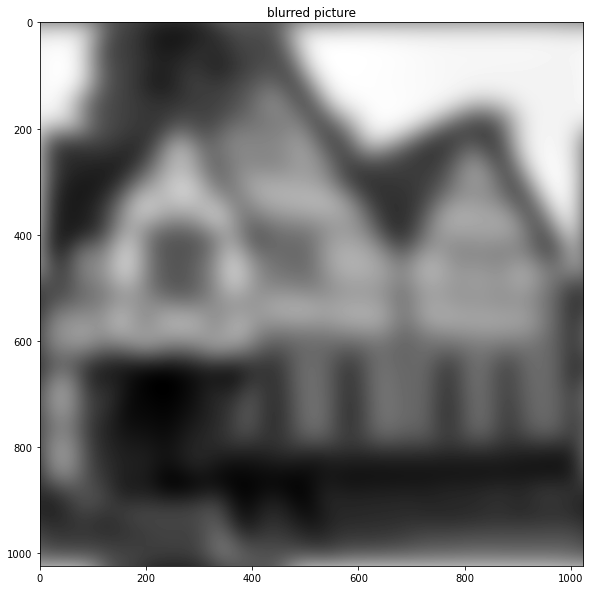

In [5]:
#in case you want to reproducr please uncomment the following line and run

#with open('blur.txt', 'r') as file1
D=np.loadtxt('blur.txt')

plt.figure(figsize=(10,10))
plt.imshow(D, cmap='gray')
plt.title('blurred picture')



In [9]:
#making the gaussian smearing function

sigma=25
I=np.zeros(D.shape)
r=I.shape[0]
c=I.shape[1]

def gauss(x,y,sigma):
    return math.exp(-(x**2+y**2)/(2*sigma**2))


for i in range(r):
    for j in range(c):
        if(i<r/2 and j<c/2):
            I[i][j]=gauss(i,j,sigma)
        elif(i<r/2 and j>=c/2):
            I[i][j]=gauss(i, c-j, sigma)
        elif(i>=r/2 and j<c/2):
            I[i][j]=gauss(r-i, j, sigma)
        elif(i>=r/2 and j>=c/2):
            I[i][j]=gauss(r-i, c-j, sigma)





D_fft2=np.fft.fft2(D)
I_rfft2=np.fft.fft2(I)

I_smooth=I_rfft2.copy()
I_smooth[(I_smooth)<1e-3]=1

result= np.divide(D_fft2, I_smooth)

unblur=np.fft.ifft2(result)

unblur=np.abs(unblur)





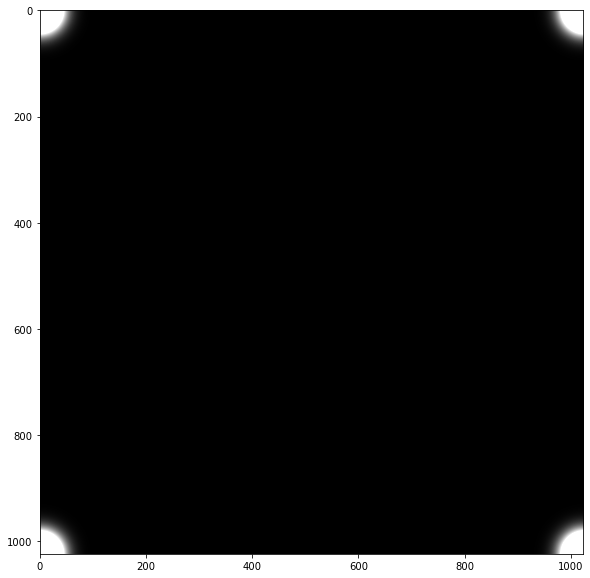

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(I, cmap='gray', vmax=0.2)

Text(0.5, 1.0, 'unblurred photo')

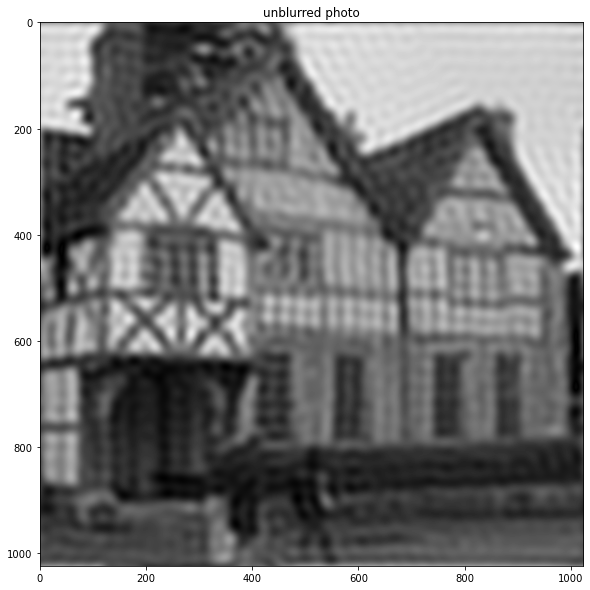

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(unblur, cmap='gray')
plt.title('unblurred photo')

If the picture has too many frequencies missing, like the above picture has some discrete sharp boundaries. So, there is less gradiation of frequencies, this is indicative of absence or very small value of several frequency components. This gives rise to problems in de-blurring the photo.